# Telco Customer Churn Prediction

### Models/Algorithms to be used
- Neural Networks
- Support Vector Machine
- K-Nearest Neighbors
- Boosting with Decision Trees

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport


from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV,validation_curve,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour

/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
gtid = 903971235

## Load and Analyze Data

In [4]:
df = pd.read_csv("data/telco/Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### I can take some help from the pandas profiling package for the initial EDA

In [4]:
# !pip install ydata-profiling

In [5]:
profile = ProfileReport(df, title="Telco-Profiling-Report")

In [19]:
profile.to_file("Telco-Profiling-Report")
profile.to_notebook_iframe()


/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/ydata_profiling/profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 453.54it/s]


##### Quick Notes

1. No Missing Values
2. Class Imbalance (73.5% Non Churned Users/26.5% Churned)
3. 12 Categorical | 5 Binary | 2 Numerical | 2 Text Features
4. Total Charges is recorded in string; need to change
5. Monthly charges range between $18-118; mean around $64


## Further exploration


In [5]:
# Checking the data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.dropna(subset=['TotalCharges'], how='all', inplace=True)



In [9]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.Churn.values[:3]

array(['No', 'No', 'Yes'], dtype=object)

In [11]:
dfcopy = df.drop(columns=['customerID'], axis=1)
dfcopy

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

## Label Encoding: Converting Categorical Data to Numerical

In [12]:
# Converting the target variable to integer
dfcopy['Churn'] = dfcopy['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
dfcopy.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [13]:
# Identify categorical columns 
categorical_columns = dfcopy.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical Columns: {categorical_columns}")

# Identify binary columns (subset of categorical columns with only two unique values)
binary_columns = [col for col in categorical_columns if dfcopy[col].nunique() == 2]
print(f"Binary Columns: {binary_columns}")

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Binary Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [14]:
label_encoder = LabelEncoder()
for col in binary_columns:
    dfcopy[col] = label_encoder.fit_transform(dfcopy[col])


In [15]:
dfcopy[binary_columns]

gender  Partner  Dependents  PhoneService  PaperlessBilling
0          0        1           0             0                 1
1          1        0           0             1                 0
2          1        0           0             1                 1
3          1        0           0             0                 0
4          0        0           0             1                 1
...      ...      ...         ...           ...               ...
7038       1        1           1             1                 1
7039       0        1           1             1                 1
7040       0        1           1             0                 1
7041       1        1           0             1                 1
7042       1        0           0             1                 1

[7032 rows x 5 columns]

## One Hot Encoding to convert Categorical Features into Numerical Features

In [16]:
categorical_columns = [col for col in categorical_columns if col not in binary_columns]
print(categorical_columns)
dfcopy = pd.get_dummies(dfcopy, columns=categorical_columns).astype(int)
dfcopy.head()

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1              29            29      0  ...   
1                 0              56          1889      0  ...   
2                 1              53           108      1  ...   
3                 0              42          1840      0  ...   
4                 1              70           151      1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   1                                    0   
1                   1                                    0   
2                   1                                    0   
3                   1                                    0   
4                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 41 columns]

##### Okay, so now we have a completely numeric, non-missing value dataset.

In [17]:
dff = dfcopy.copy()


## Visual Data Exploration 


##### 1. Correlation of the target variable (Churn) with every other variable

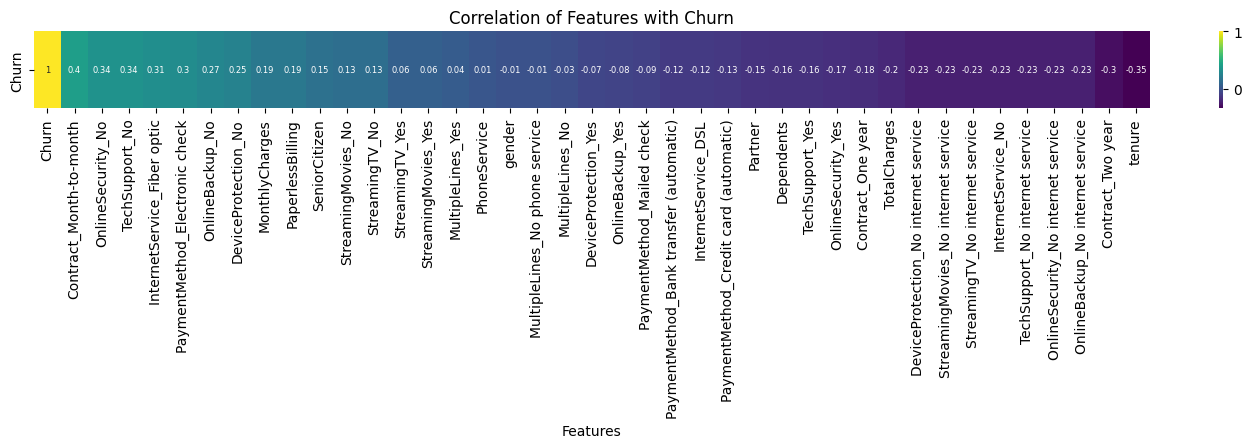

In [19]:
corr_matrix = dff.corr()
churn_corr = corr_matrix['Churn'].sort_values(ascending=False).round(2)
churn_corr = churn_corr.to_frame().T

plt.figure(figsize=(18, 1))
sns.heatmap(churn_corr, cmap='viridis', cbar=True, xticklabels=churn_corr.columns,annot=True, annot_kws={'size': 6})
plt.xlabel('Features')
plt.title('Correlation of Features with Churn')
plt.show()

##### Interesting Findings here

1. Monthly contracts have the highest direct correlation to churn (0.4)
2. Absence of online security, no tech support, fiber optic internet service and E-Check payments are also directly correlated with churn

3. Longer contracts (1 year, 2 year) are negatively correlated with churn
4. Services such as Online security, [streaming TV, online backup, tech support, etc. without internet connection] seem to be negatively related to churn.


##### 2. We've already seen the distributions for gender, senior citizen, dependents and partner. I will dive deeper into Customer Account Info

Text(0.5, 1.0, 'Customer Count by Tenure and Churn')

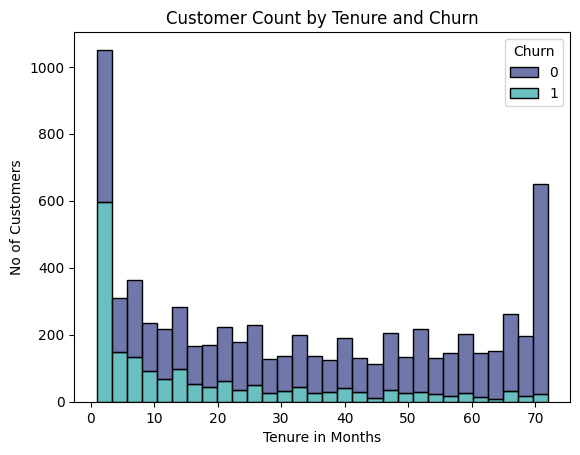

In [40]:
# Tenure

ax = sns.histplot(data=dff, x='tenure', hue='Churn', palette='mako', multiple='stack', bins=30)
ax.set_ylabel("No of Customers")
ax.set_xlabel("Tenure in Months")
ax.set_title("Customer Count by Tenure and Churn")

##### As is obvious, the number of churned customers decrease as their tenure duration increase.


Text(0.5, 1.0, 'Customer Count by Charges and Churn')

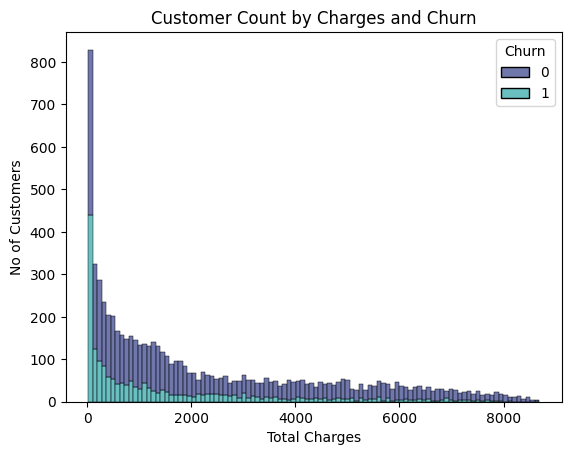

In [70]:
# Total Charges

ax = sns.histplot(data=dff, x='TotalCharges', hue='Churn', palette='mako', multiple='stack', bins=100)
ax.set_ylabel("No of Customers")
ax.set_xlabel("Total Charges")
ax.set_title("Customer Count by Charges and Churn")

##### As total charges increase, churn reduces. Mostly, churn is prevalent for low-value accounts.

Text(0.5, 1.0, 'Customer Count by Contract Types and Churn')

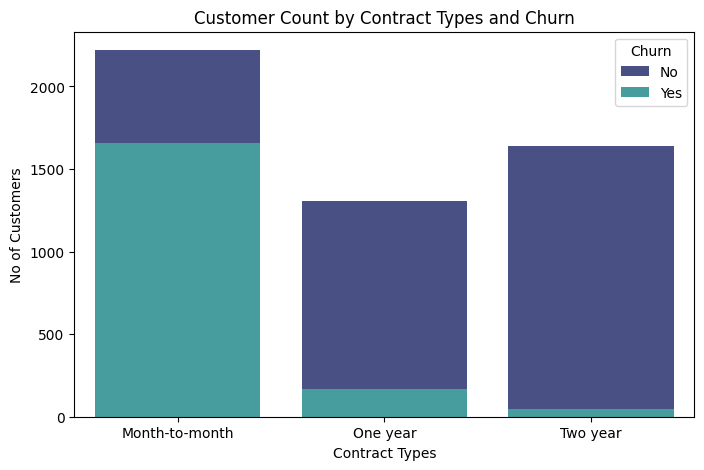

In [88]:
# Churn by Contract Type



plt.figure(figsize=(8, 5)) 
ax = sns.countplot(data=df, x='Contract', hue='Churn',dodge=False,palette='mako')



ax.set_ylabel("No of Customers")
ax.set_xlabel("Contract Types")
ax.set_title("Customer Count by Contract Types and Churn")

In [87]:
churn_percentage = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).round(2).rename('Percentage').reset_index()
churn_percentage

Contract Churn  Percentage
0  Month-to-month    No       57.29
1  Month-to-month   Yes       42.71
2        One year    No       88.72
3        One year   Yes       11.28
4        Two year    No       97.15
5        Two year   Yes        2.85

##### Clearly, most churn is from customers with monthly contracts, and minimum is from people with 2 year contracts.


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

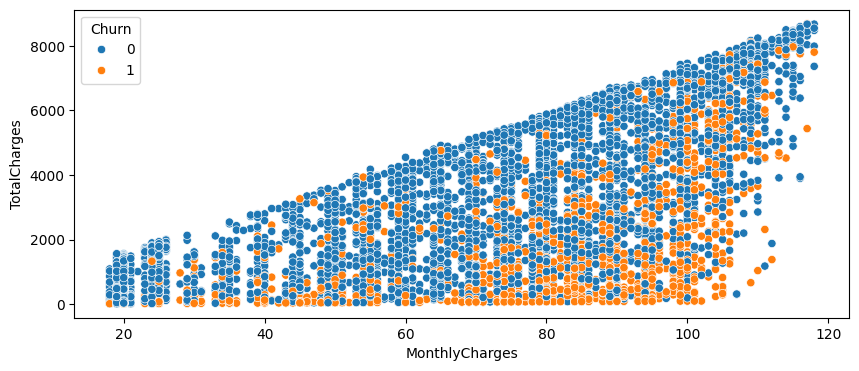

In [99]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=dff, x='MonthlyCharges', y='TotalCharges', hue='Churn')

##### The Churn Rate increases with monthly charges increasing, however, more monthly charges lead to larger total charges.

## Feature Scaling and Transformations, Train-Test-Split, Class Imbalance Handling

In [18]:
# Monthly Charges and Total Charges can be log transformed to get onto a similar range

dff['MonthlyCharges']=np.log1p(dff['MonthlyCharges'])
dff['TotalCharges']=np.log1p(dff['TotalCharges'])

dff[['MonthlyCharges','TotalCharges']]

MonthlyCharges  TotalCharges
0           3.401197      3.401197
1           4.043051      7.544332
2           3.988984      4.691348
3           3.761200      7.518064
4           4.262680      5.023881
...              ...           ...
7038        4.442651      7.596392
7039        4.644391      8.904223
7040        3.401197      5.849325
7041        4.317488      5.726848
7042        4.663439      8.831274

[7032 rows x 2 columns]

#### Train Test Splitting

In [19]:
y = dff['Churn'].values
X = dff.drop(columns = ['Churn'])



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


#### Handling Class Imbalance (Data Augmentation)

In [142]:
# sm = SMOTE(random_state = 0, sampling_strategy = 'minority', k_neighbors= 5)
# X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

/var/folders/fm/q2dp1pts1kvf1zc3pcp8sgjm0000gp/T/ipykernel_69195/133161699.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='mako')


<Axes: ylabel='count'>

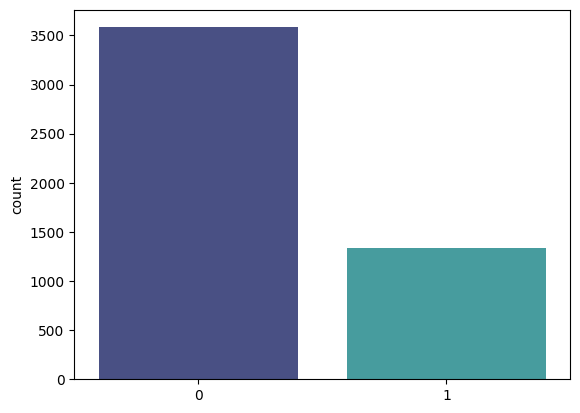

In [21]:
sns.countplot(x=y_train, palette='mako')

## Modelling

### 1. Neural Networks: Multi Layered Perceptron 

##### Starting with 2 hidden layers of size 32 & 16, with alpha = 1e-5

In [208]:
model_mlp = MLPClassifier(solver='adam',
                alpha=1e-5, 
                hidden_layer_sizes=(32),
                random_state=1,
                max_iter=1000
                )

##### Stratified KFold Cross Validation for Training 

In [39]:
def evaluate_model_with_cv(estimator, X_train, y_train, cv=5):

    kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Lists to store metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []

    # Iterate through each fold
    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        # Fit the model
        estimator.fit(X_train_fold, y_train_fold)
        
        # Make predictions
        y_val_pred = estimator.predict(X_val_fold)
        y_val_pred_proba = estimator.predict_proba(X_val_fold)[:, 1]
        
        # Calculate metrics
        accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
        precision_scores.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
        recall_scores.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
        f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
        roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_pred_proba, multi_class='ovr'))

    # Convert lists to numpy arrays for easy calculation of mean and standard deviation
    accuracy_scores = np.array(accuracy_scores)
    precision_scores = np.array(precision_scores)
    recall_scores = np.array(recall_scores)
    f1_scores = np.array(f1_scores)
    roc_auc_scores = np.array(roc_auc_scores)

    # Print the metrics
    print(f"Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
    print(f"Precision: {precision_scores.mean():.4f} ± {precision_scores.std():.4f}")
    print(f"Recall: {recall_scores.mean():.4f} ± {recall_scores.std():.4f}")
    print(f"F1 Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")
    print(f"ROC AUC Score: {roc_auc_scores.mean():.4f} ± {roc_auc_scores.std():.4f}")

    # Return the metrics in a dictionary
    return {
        'accuracy': (accuracy_scores.mean(), accuracy_scores.std()),
        'precision': (precision_scores.mean(), precision_scores.std()),
        'recall': (recall_scores.mean(), recall_scores.std()),
        'f1': (f1_scores.mean(), f1_scores.std()),
        'roc_auc': (roc_auc_scores.mean(), roc_auc_scores.std())
    }



In [210]:
metrics = evaluate_model_with_cv(model_mlp, X_train, y_train)
print(metrics)


Accuracy: 0.7926 ± 0.0142
Precision: 0.7836 ± 0.0137
Recall: 0.7926 ± 0.0142
F1 Score: 0.7820 ± 0.0168
ROC AUC Score: 0.8453 ± 0.0184
{'accuracy': (0.792569848541125, 0.014213994615929168), 'precision': (0.7835863293974732, 0.013684936850731421), 'recall': (0.792569848541125, 0.014213994615929168), 'f1': (0.78199273354835, 0.016783842850590213), 'roc_auc': (0.8453173757716568, 0.01837762808927836)}


##### Train Initial Model on Entire Training Data


In [211]:
model_mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=32, max_iter=1000, random_state=1)

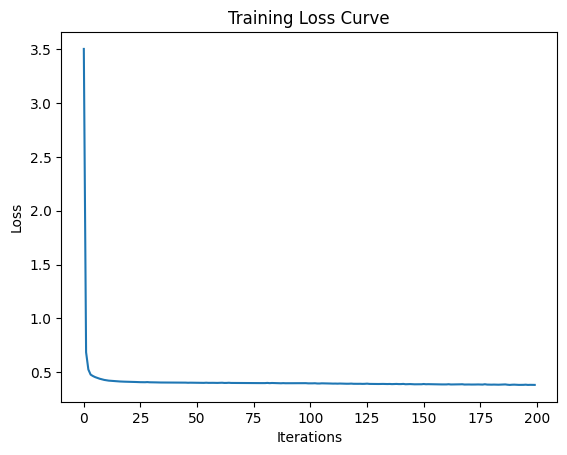

In [212]:
plt.plot(model_mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


#### Evaluation of Base Model

In [27]:
#Accuracy, Precision, Recall, F1 and ROC AUC and Confusion Matrix


def evaluate_model_performace(model,X_test,y_test):

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")


    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return {
        'accuracy': round(accuracy,3),
        'precision': round(precision,3),
        'recall': round(recall,3),
        'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
    }


Accuracy: 0.8000
Precision: 0.6459
Recall: 0.4509
F1 Score: 0.5311
ROC AUC Score: 0.8286


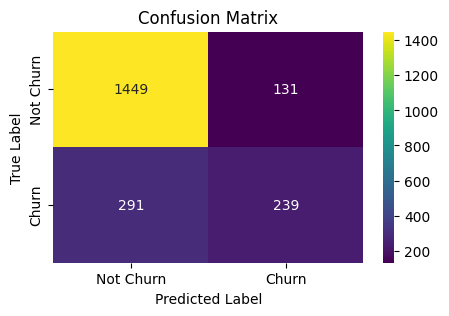

In [216]:
model_performance_on_test = evaluate_model_performace(model_mlp,X_test,y_test)

#### Grid Search for Hyperparameter Tuning

In [30]:
param_grid = {
    'hidden_layer_sizes': [(16,), (32,), (64,), (32, 16), (64, 32),(64,32,16)],
    'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'learning_rate_init': [0.0001,0.001, 0.01, 0.1]
}

In [31]:
base_model_mlp = MLPClassifier(solver='adam', random_state=1, max_iter=1000)


grid_search = GridSearchCV(estimator=base_model_mlp, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.01; total time=   1.0s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.1; total time=   0.9s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.01; total time=   1.0s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.01; total time=   1.2s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.001; total time=   1.8s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.1; total time=   0.8s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.1; total time=   0.7s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.1; total time=   1.0s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.1; total time=   1.2s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.01; total time=   2.4s
[CV] END alpha=1e-06, hidden_layer_sizes=(16,), learning_rate_init=0.001; total time

/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=1e-05, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.0001; total time=  58.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(32, 16), learning_rate_init=0.0001; total time=  19.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(32, 16), learning_rate_init=0.0001; total time=  21.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   1.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   1.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   7.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   2.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   2.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.0001; total time=  13.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  12.9s
[CV] END alpha=0.0001, hidden_la

/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.0001; total time=  55.7s


/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(32, 16), learning_rate_init=0.0001; total time=  18.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.0001; total time=  55.2s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   8.5s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   2.0s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   2.5s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.0001; total time=  12.2s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   1.3s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   1.7s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  11.8s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=  10.5s
[CV] END alpha=0.001, hidden_layer_sizes=

/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.0001; total time=   9.7s
[CV] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   1.5s
[CV] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.0001; total time=  10.6s
[CV] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   1.7s
[CV] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   1.6s
[CV] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   2.1s
[CV] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.0001; total time=  11.7s
[CV] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=  17.5s
[CV] END alpha=0.01, hidden_layer_sizes=(32, 16), learning_rate_init=0.001; total time=   9.8s
[CV] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=  19.1s
[CV] END alpha=0.01, hidden_layer_sizes=(32, 16), learning_rate_init=0.01; total t

/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.0001; total time= 1.2min
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  10.5s


/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.0001; total time= 1.2min
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   7.6s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=  10.9s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=  11.7s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   2.0s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   2.9s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   3.7s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.0001; total time=  15.2s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   3.0s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   7.3s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learn

/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nasharma/GATECH ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.0001; total time=  57.2s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.0001; total time=  58.3s


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=1),
             n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(16,), (32,), (64,), (32, 16),
                                                (64, 32), (64, 32, 16)],
                         'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=2)

In [34]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'alpha': 0.01, 'hidden_layer_sizes': (16,), 'learning_rate_init': 0.0001}


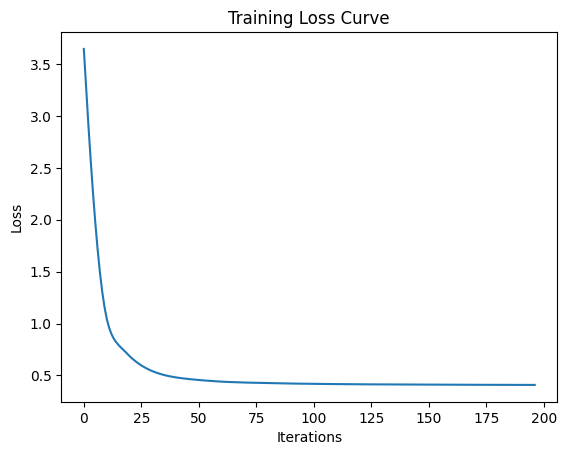

In [35]:
# Train the final model with the best parameters
model_mlp_best = MLPClassifier(solver='adam', 
                               alpha=best_params['alpha'], 
                               hidden_layer_sizes=best_params['hidden_layer_sizes'], 
                               learning_rate_init=best_params['learning_rate_init'],
                               random_state=1, 
                               max_iter=1000)

model_mlp_best.fit(X_train, y_train)

# Plot the training loss curve
plt.plot(model_mlp_best.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


##### Evaluation of Final Model: Performance Metrics

Accuracy: 0.8081
Precision: 0.6499
Recall: 0.5113
F1 Score: 0.5723
ROC AUC Score: 0.8387


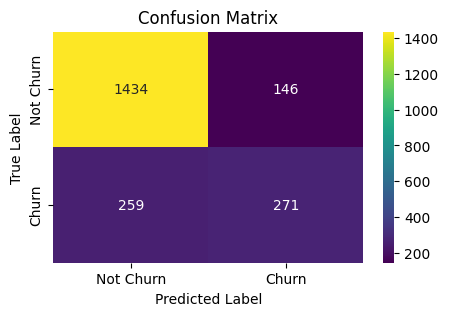

In [36]:
results = evaluate_model_performace(model_mlp_best,X_test,y_test)


####  Plotting Validation Curves for Each of the Three Hyperparams

In [58]:
def plot_validation_curve(estimator, X, y, param_name, param_range, param_is_tuple=False, cv=5, scoring='accuracy', n_jobs=-1):

    if param_is_tuple:
        train_scores, test_scores = [], []
        train_scores_std, test_scores_std = [], []
        for param in param_range:
            train_score, test_score = validation_curve(
                estimator, X, y,
                param_name=param_name,
                param_range=[param],  # Pass param as a single-element list
                cv=cv,
                scoring=scoring,
                n_jobs=n_jobs
            )
            train_scores.append(train_score.mean())
            train_scores_std.append(train_score.std())
            test_scores.append(test_score.mean())
            test_scores_std.append(test_score.std())
        train_scores = np.array(train_scores)
        test_scores = np.array(test_scores)
        train_scores_std = np.array(train_scores_std)
        test_scores_std = np.array(test_scores_std)
    else:
        train_scores, test_scores = validation_curve(
            estimator, X, y, 
            param_name=param_name, 
            param_range=param_range, 
            cv=cv, 
            scoring=scoring, 
            n_jobs=n_jobs
        )
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

    # Plot validation curve
    plt.figure(figsize=(10, 6))
    plt.title(f"Validation Curve for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.7, 1.0)
    lw = 2

    if param_is_tuple:
        param_range_str = [str(param) for param in param_range]
        plt.plot(param_range_str, train_scores, label="Training score", color="darkorange", lw=lw)
        plt.fill_between(param_range_str, train_scores - train_scores_std, train_scores + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
        plt.plot(param_range_str, test_scores, label="Cross-validation score", color="navy", lw=lw)
        plt.fill_between(param_range_str, test_scores - test_scores_std, test_scores + test_scores_std, alpha=0.2, color="navy", lw=lw)
    else:
        plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
        plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)

    plt.legend(loc="best")
    plt.show()



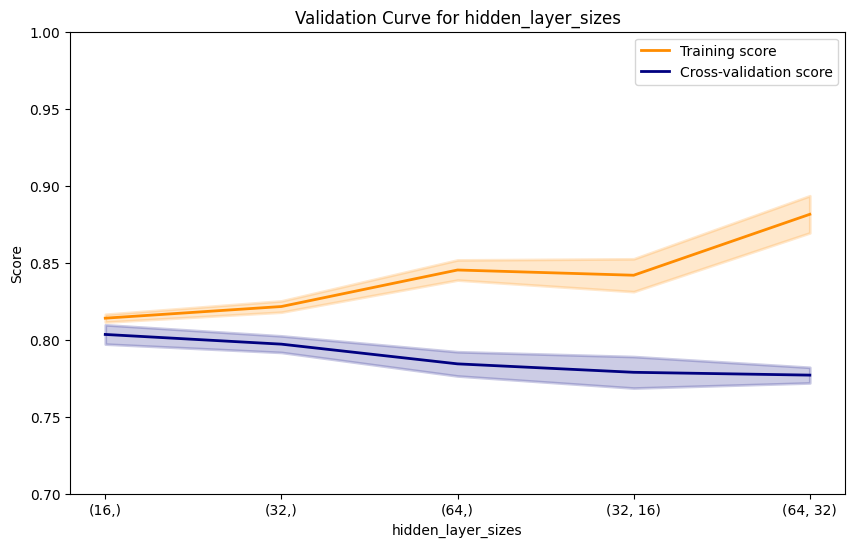

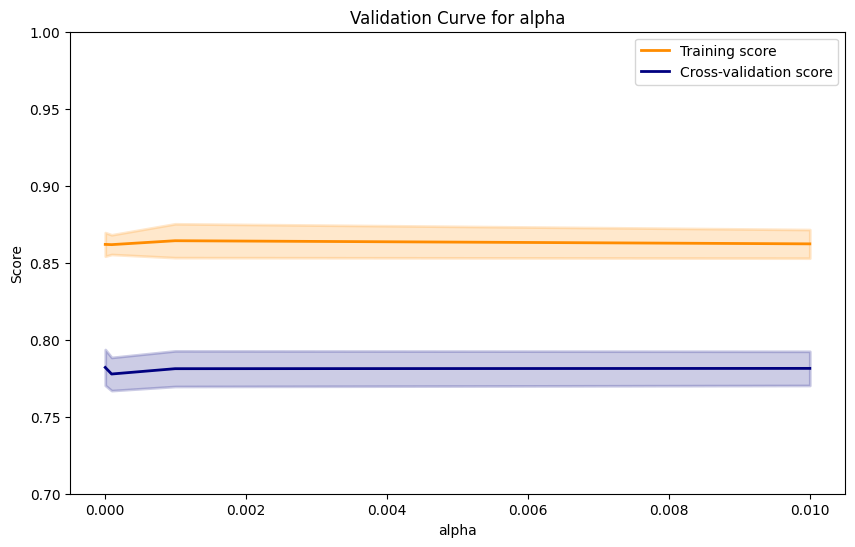

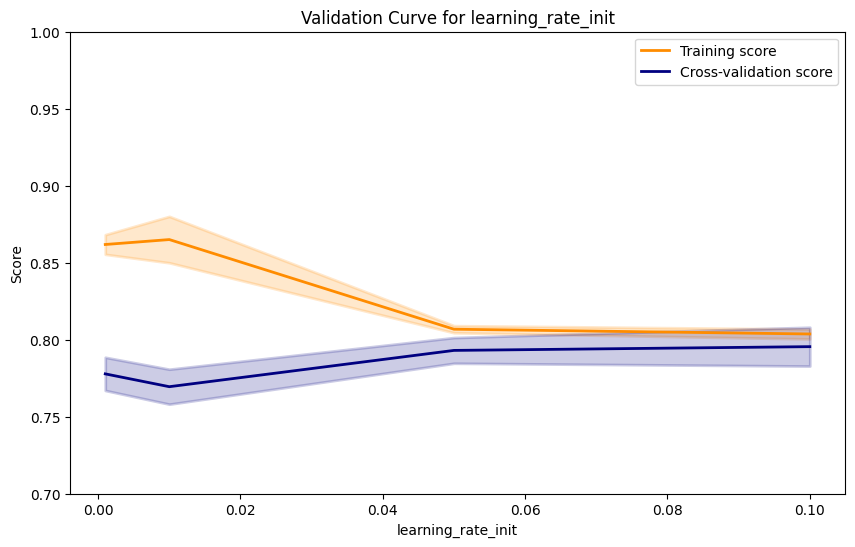

In [178]:

# Define the parameter ranges
hidden_layer_sizes_range = [(16,), (32,), (64,), (32, 16), (64, 32)]
alpha_range = [1e-5, 1e-4, 1e-3, 1e-2]
learning_rate_init_range = [0.001, 0.01, 0.05, 0.1]

# Initialize the MLPClassifier with base parameters
base_model = MLPClassifier(solver='adam', random_state=1, max_iter=1000)

# Plot validation curves for each parameter
plot_validation_curve(base_model, X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes_range, param_is_tuple=True)
plot_validation_curve(base_model, X_train, y_train, 'alpha', alpha_range)
plot_validation_curve(base_model, X_train, y_train, 'learning_rate_init', learning_rate_init_range)


#### Learning Curves

In [277]:
def plot_learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    # Generate the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        scoring=scoring
    )

    # Calculate mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Print train sizes
    print("Training sizes used:", train_sizes)

    # Plot learning curves
    plt.figure(figsize=(8, 6))
    plt.title(f"Learning Curves with {type(estimator).__name__}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim(0.7, 1)
    lw = 2

    # Plot training scores
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)

    # Plot cross-validation scores
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)

    plt.legend(loc="best")
    plt.show()

Training sizes used: [ 393  787 1181 1574 1968 2362 2755 3149 3543 3937]


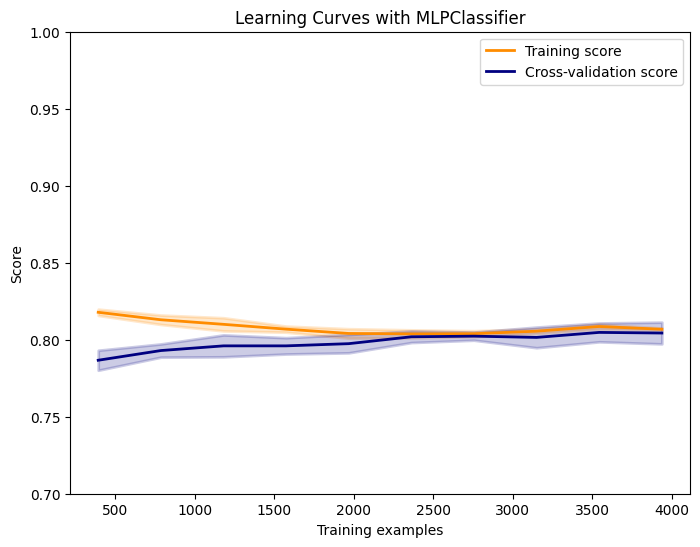

In [278]:
plot_learning_curve(model_mlp_best, X_train, y_train)


### 2. Support Vector Machines

In [184]:
dff.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1        3.401197      3.401197      0  ...   
1                 0        4.043051      7.544332      0  ...   
2                 1        3.988984      4.691348      1  ...   
3                 0        3.761200      7.518064      0  ...   
4                 1        4.262680      5.023881      1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   1                                    0   
1                   1                                    0   
2                   1                                    0   
3                   1                                    0   
4                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 41 columns]

#### Initialize a base SVM Model

In [37]:


model_svm = SVC(probability=True)

##### Stratified KFold Cross Validation for Training Evaluation

In [40]:
training_results = evaluate_model_with_cv(model_svm,X_train,y_train)

Accuracy: 0.7871 ± 0.0085
Precision: 0.7739 ± 0.0102
Recall: 0.7871 ± 0.0085
F1 Score: 0.7737 ± 0.0100
ROC AUC Score: 0.8138 ± 0.0155


#### Train Model on Full Data

In [41]:
model_svm.fit(X_train,y_train)

SVC(probability=True)


#### Evaluation of Base Model

Accuracy: 0.7929
Precision: 0.6189
Recall: 0.4566
F1 Score: 0.5255
ROC AUC Score: 0.8040


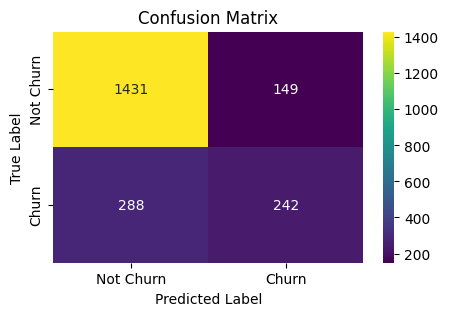

In [42]:
model_performance_on_test = evaluate_model_performace(model_svm,X_test,y_test)

#### Grid Search for Hyperparameter Tuning

In [43]:
param_grid = {
    'C': [0.1, 0.05,1, 10],
    'gamma': [1,0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}


In [46]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found:", best_params)

KeyboardInterrupt: 

In [45]:
# Train the final model with the best parameters
model_svm_best = SVC(C=1,gamma=1,kernel='linear',probability=True)
                        
model_svm_best.fit(X_train, y_train)




SVC(C=1, gamma=1, kernel='linear', probability=True)

##### Evaluation of Final Model: Performance Metrics

Accuracy: 0.8137
Precision: 0.6659
Recall: 0.5189
F1 Score: 0.5832
ROC AUC Score: 0.8392


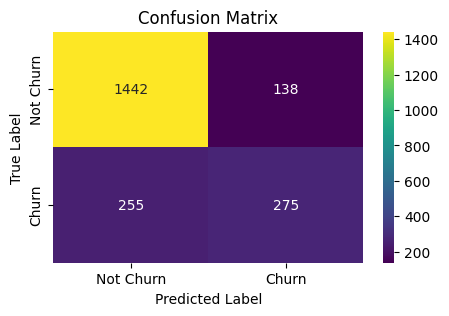

In [47]:

metrics = evaluate_model_performace(model_svm_best, X_test,y_test)


####  Plotting Validation Curves for Gamma and C

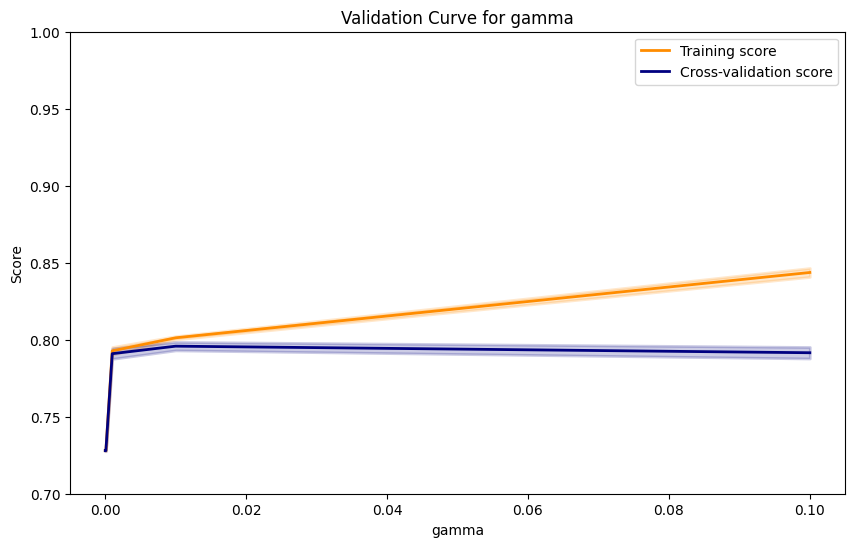

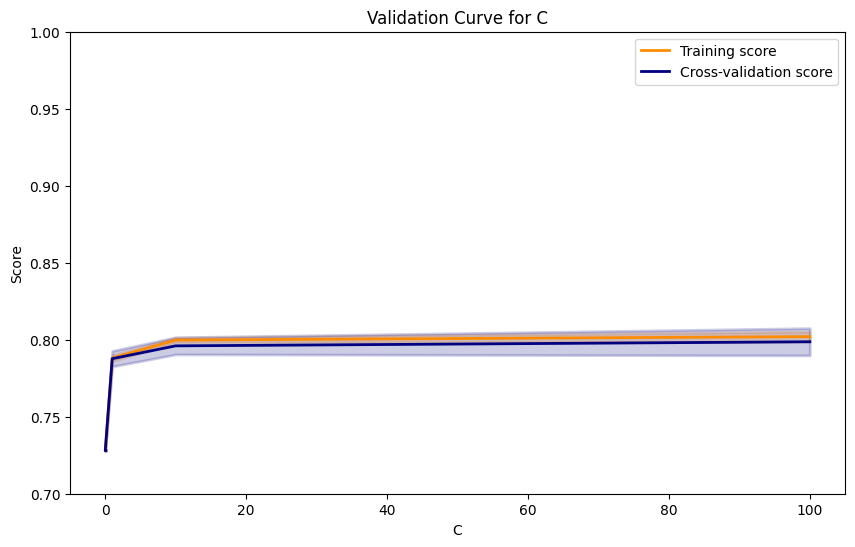

In [273]:
gamma_range = [1e-1,1e-2, 1e-3, 1e-4, 1e-5]
C_range = [0.1,0.01,1,10,100]

# Initialize the MLPClassifier with base parameters
base_model = SVC()

# Plot validation curves for each parameter
plot_validation_curve(base_model, X_train, y_train, 'gamma', gamma_range)
plot_validation_curve(base_model, X_train, y_train, 'C', C_range)

#### Learning Curve

Training sizes used: [ 393  787 1181 1574 1968 2362 2755 3149 3543 3937]


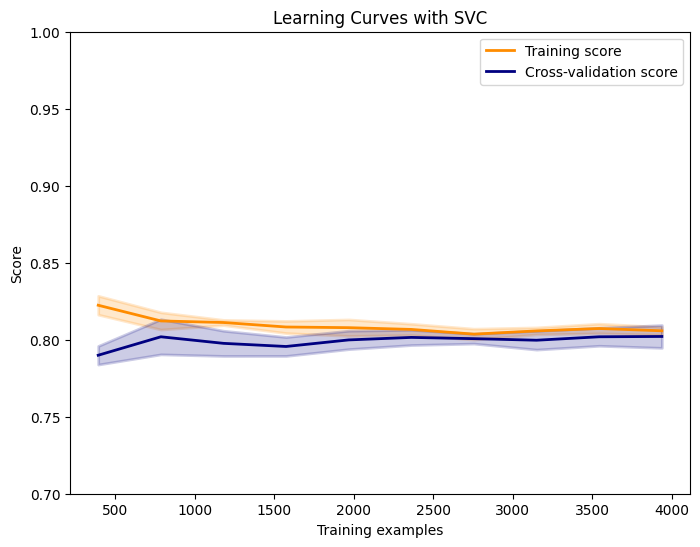

In [279]:

plot_learning_curve(model_svm_best, X_train, y_train)

#### 3. K-Nearest Neighbors

In [280]:
dff.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1        3.401197      3.401197      0  ...   
1                 0        4.043051      7.544332      0  ...   
2                 1        3.988984      4.691348      1  ...   
3                 0        3.761200      7.518064      0  ...   
4                 1        4.262680      5.023881      1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   1                                    0   
1                   1                                    0   
2                   1                                    0   
3                   1                                    0   
4                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 41 columns]

#### Initialize KNN Model

In [48]:

# Initialize the Base KNN classifier
model_knn = KNeighborsClassifier()

##### Stratified KFold Cross Validation for Training Evaluation

In [49]:
knn_metrics = evaluate_model_with_cv(model_knn, X_train, y_train)



Accuracy: 0.7641 ± 0.0125
Precision: 0.7578 ± 0.0169
Recall: 0.7641 ± 0.0125
F1 Score: 0.7603 ± 0.0156
ROC AUC Score: 0.7873 ± 0.0164


#### Train Model on Full Data

In [50]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Evaluation of Base Model


Accuracy: 0.7616
Precision: 0.5265
Recall: 0.5057
F1 Score: 0.5159
ROC AUC Score: 0.7784


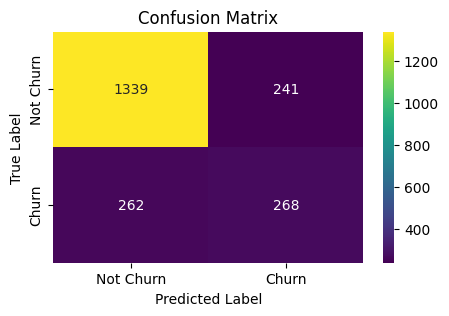

In [51]:
model_performance_on_test = evaluate_model_performace(model_knn,X_test,y_test)

#### Grid Search for Hyperparameter Tuning

In [52]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [53]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_knn_params = grid_search.best_params_
print("Best parameters found:", best_knn_params)

model_knn_best = grid_search.best_estimator_

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}


##### Evaluation of Final Model: Performance Metrics


Accuracy: 0.8014
Precision: 0.6325
Recall: 0.5000
F1 Score: 0.5585
ROC AUC Score: 0.8232


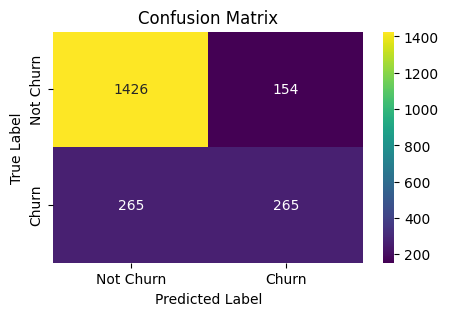

In [55]:
metrics = evaluate_model_performace(model_knn_best, X_test, y_test)


####  Plotting Validation Curves for n_neighbors and p (which defines power for minkowski metric)


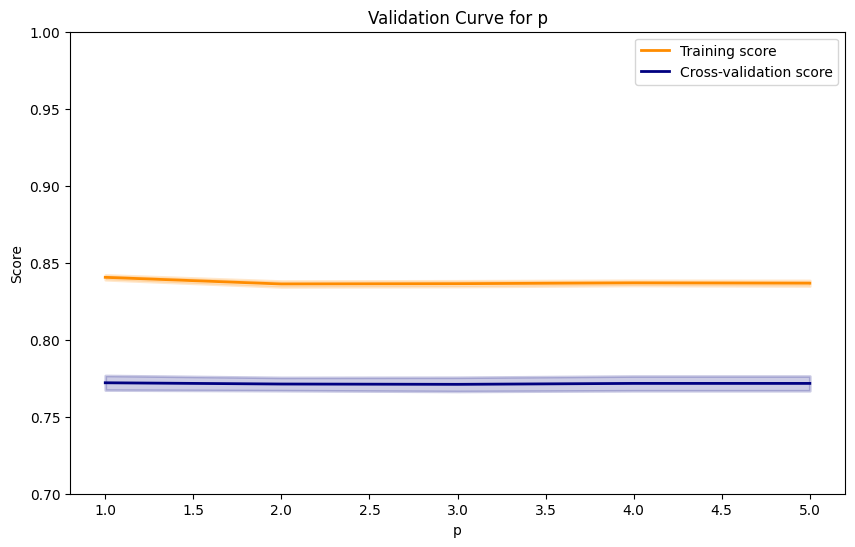

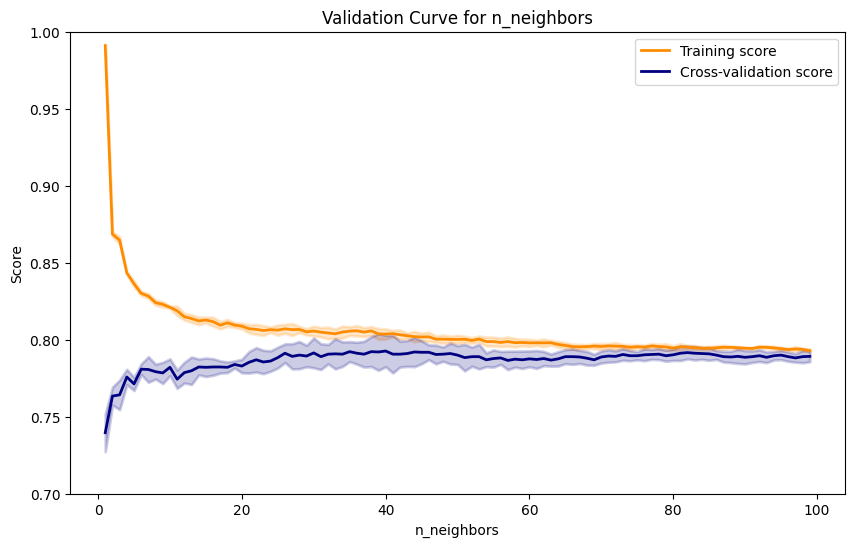

In [59]:
param_range_p = [1, 2, 3, 4, 5]
n_neighbors_range = np.arange(1,100)

knn_base = KNeighborsClassifier()

# Generate validation curve for 'p' parameter
plot_validation_curve(knn_base, X_train, y_train, param_name='p', param_range=param_range_p)
# Generate validation curve for 'n_neighbors'
plot_validation_curve(knn_base, X_train, y_train, param_name='n_neighbors', param_range=n_neighbors_range)


#### Learning Curve

Training sizes used: [ 393  787 1181 1574 1968 2362 2755 3149 3543 3937]


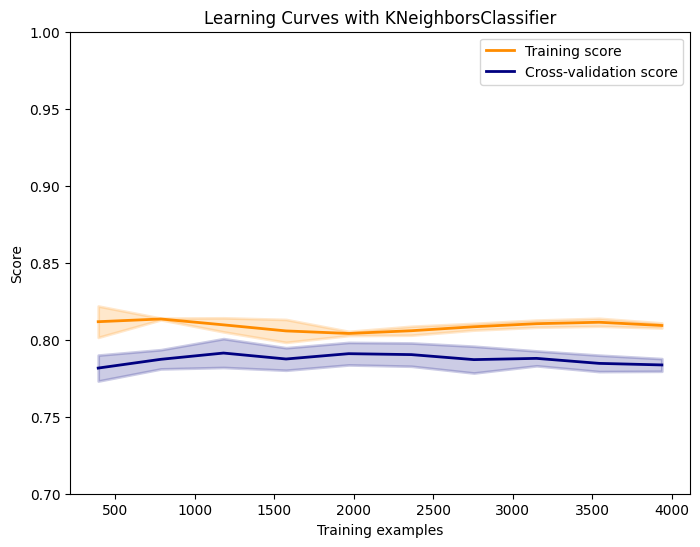

In [303]:
plot_learning_curve(model_knn_best, X_train, y_train)


#### 4. Boosting with Decision Trees